In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [50]:
df = pd.read_csv(r'../input/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Visualization

In [52]:
plt.style.use('fivethirtyeight')

### Histograms

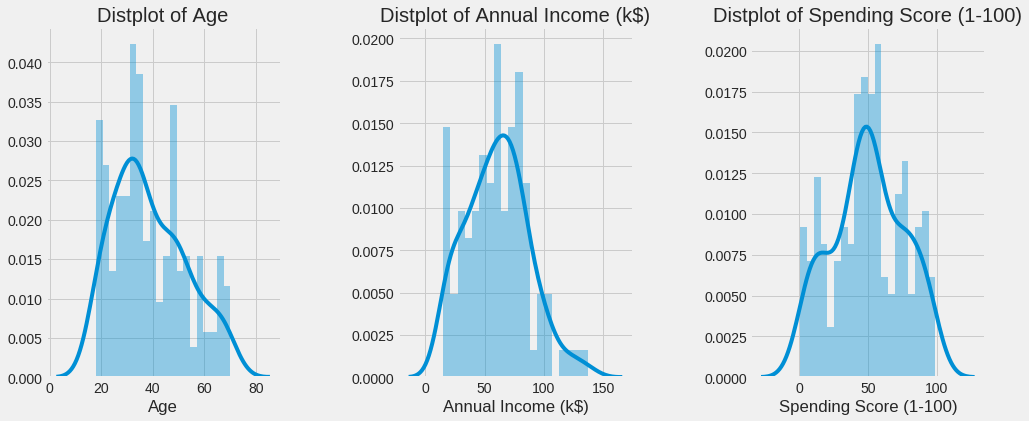

In [53]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Count Plot of Gender

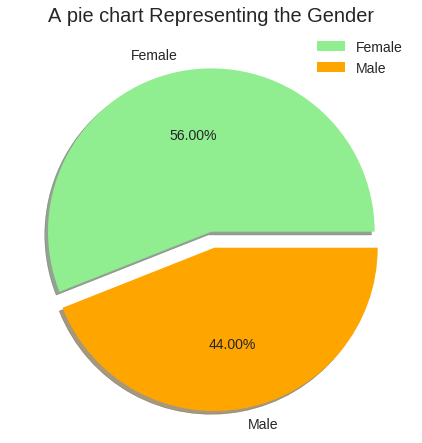

In [54]:
labels = ['Female', 'Male']
size = [112, 88]
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('A pie chart Representing the Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

### Ploting the Relation between Age , Annual Income and Spending Score

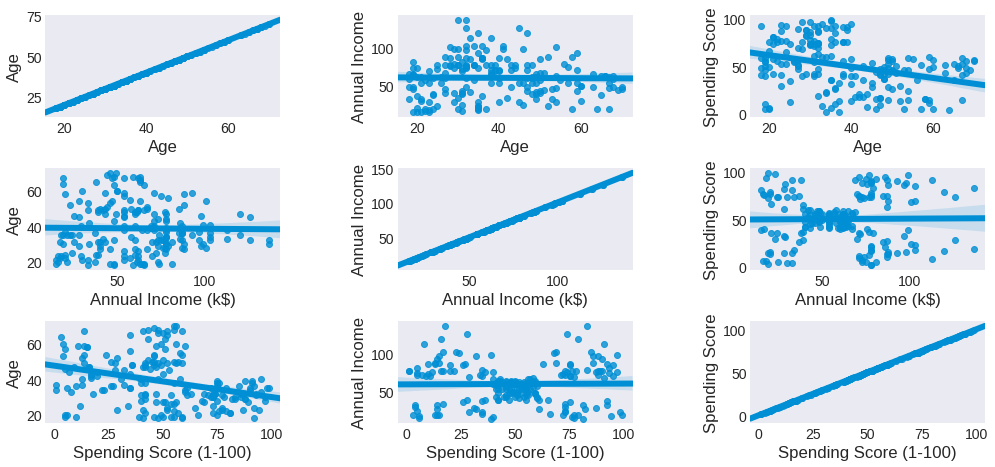

In [55]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

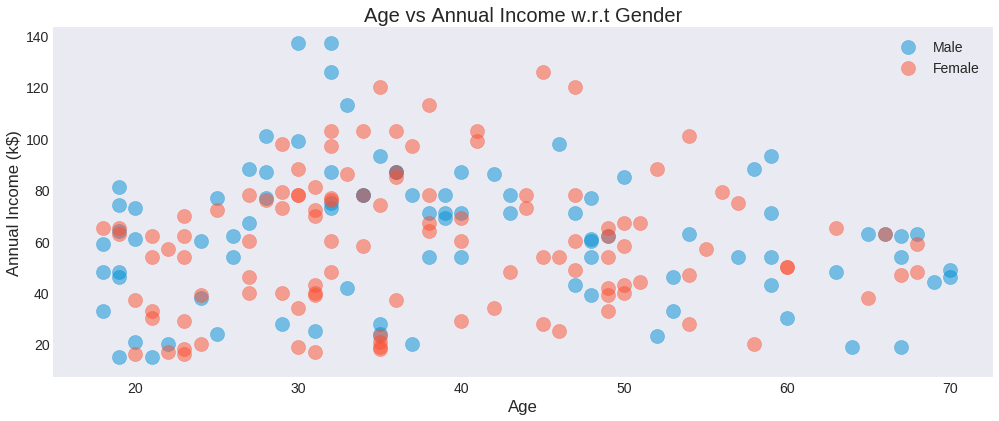

In [56]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

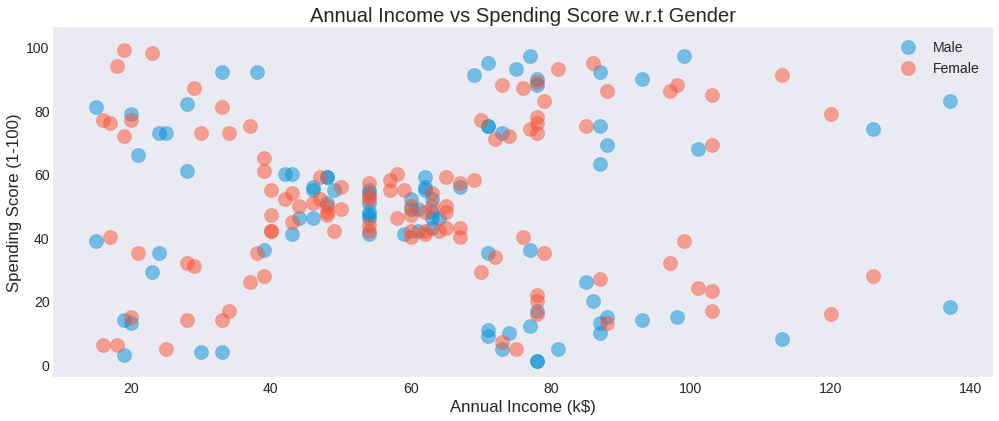

In [57]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

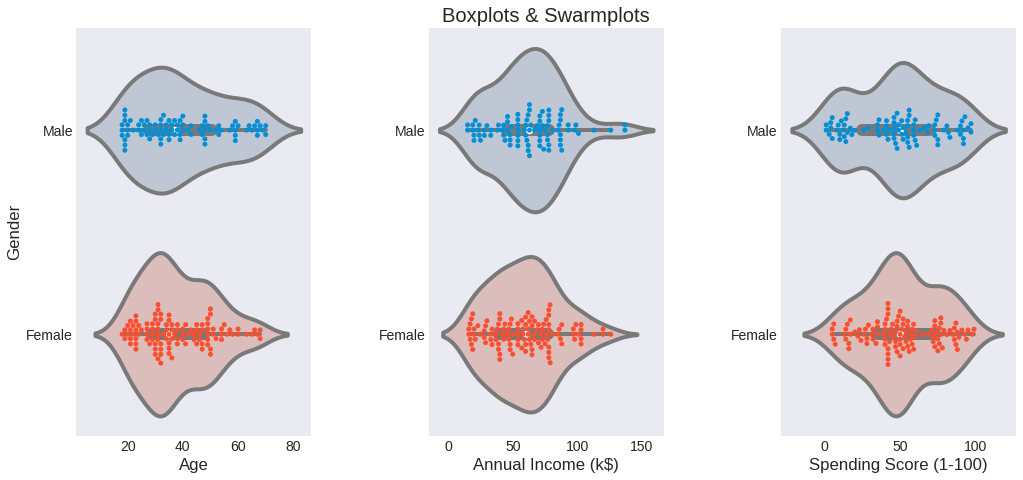

In [58]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

### 1.Segmentation using Age and Spending Score

In [59]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

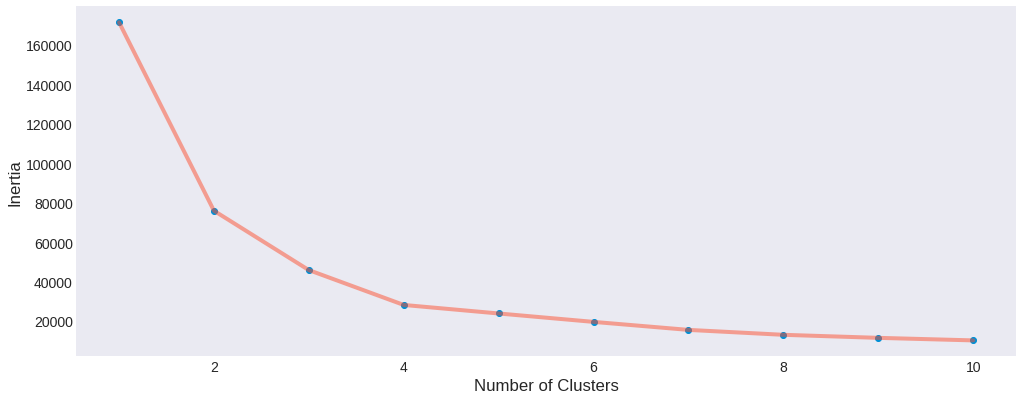

In [60]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [61]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [62]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

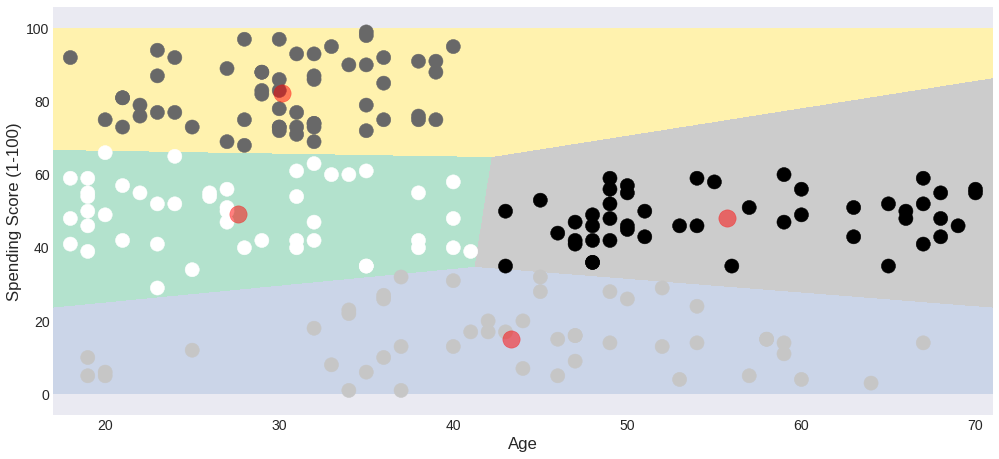

In [63]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [64]:
x_centroid = centroids1[: , 0]
y_centroid = centroids1[: , 1]

# 4 cohourts of users
for i in range(len(x_centroid)):
    print('User Group ', i)
    print('AGE', x_centroid[i])
    print('Spending Score', y_centroid[i])
    print('______________________________________________')

User Group  0
AGE 27.617021276595736
Spending Score 49.148936170212764
______________________________________________
User Group  1
AGE 43.29166666666667
Spending Score 15.020833333333307
______________________________________________
User Group  2
AGE 30.175438596491215
Spending Score 82.35087719298244
______________________________________________
User Group  3
AGE 55.70833333333332
Spending Score 48.229166666666664
______________________________________________


### 2. Segmentation using  Annual Income and Spending Score

In [65]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

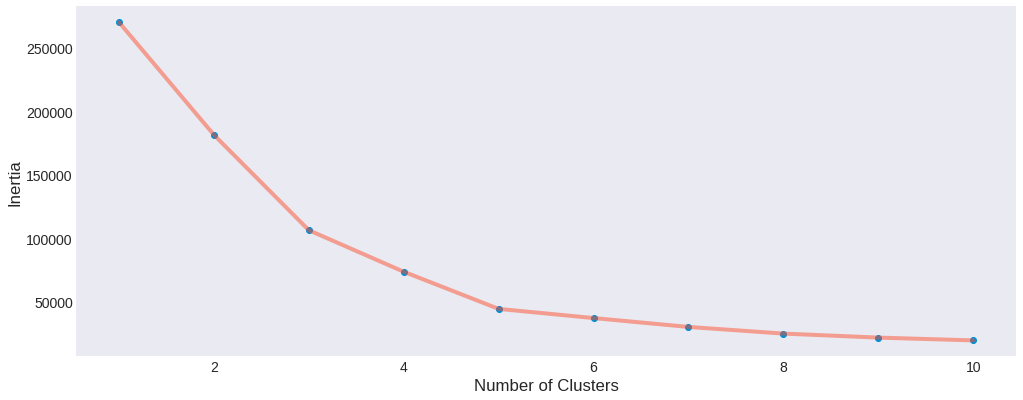

In [66]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [67]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [68]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

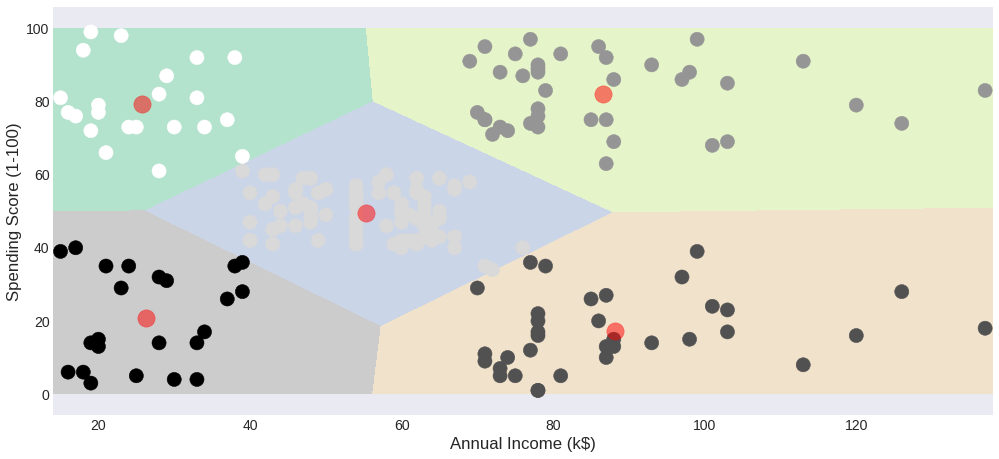

In [69]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [70]:
x_centroid2 = centroids2[: , 0]
y_centroid2 = centroids2[: , 1]

# 4 cohourts of users
for i in range(len(x_centroid2)):
    print('User Group ', i)
    print('Annual Income', x_centroid2[i])
    print('Spending Score', y_centroid2[i])
    print('______________________________________________')

User Group  0
Annual Income 25.727272727272755
Spending Score 79.36363636363636
______________________________________________
User Group  1
Annual Income 55.29629629629632
Spending Score 49.51851851851852
______________________________________________
User Group  2
Annual Income 86.53846153846155
Spending Score 82.12820512820511
______________________________________________
User Group  3
Annual Income 88.20000000000002
Spending Score 17.1142857142857
______________________________________________
User Group  4
Annual Income 26.304347826086982
Spending Score 20.913043478260867
______________________________________________


### 3.Segmentation using Age , Annual Income and Spending Score

In [71]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

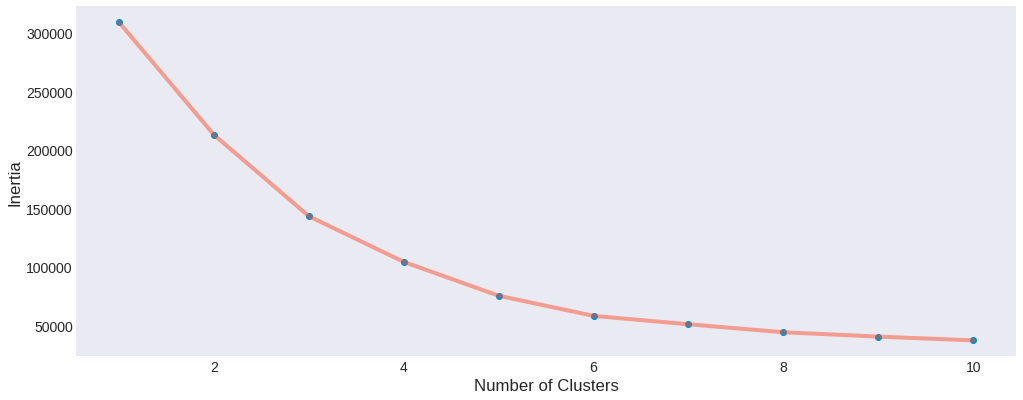

In [72]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [73]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [74]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 2
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [75]:
x_centroid3 = centroids3[: , 0]
y_centroid3 = centroids3[: , 1]
z_centroid3 = centroids3[: , 2]

# 4 cohourts of users
for i in range(len(x_centroid3)):
    print('User Group ', i)
    print('AGE', x_centroid3[i])
    print('Spending Score', y_centroid3[i])
    print('Annual Income', y_centroid3[i])
    print('______________________________________________')

User Group  0
AGE 26.999999999999993
Spending Score 56.6578947368421
Annual Income 56.6578947368421
______________________________________________
User Group  1
AGE 41.68571428571429
Spending Score 88.22857142857144
Annual Income 88.22857142857144
______________________________________________
User Group  2
AGE 56.155555555555544
Spending Score 53.37777777777778
Annual Income 53.37777777777778
______________________________________________
User Group  3
AGE 32.69230769230769
Spending Score 86.53846153846155
Annual Income 86.53846153846155
______________________________________________
User Group  4
AGE 44.142857142857146
Spending Score 25.142857142857167
Annual Income 25.142857142857167
______________________________________________
User Group  5
AGE 25.272727272727273
Spending Score 25.727272727272755
Annual Income 25.727272727272755
______________________________________________


### ADDING ANOTHER DATA e.g. campaigns by tag

In [76]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label3
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4


In [77]:
df['Promo'] = np.random.choice(['Black Friday', 'Casual Promo1', 'Casual Promo2', 'Cyber Monday'], df.shape[0])

In [78]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label3,Promo
0,1,Male,19,15,39,4,Casual Promo1
1,2,Male,21,15,81,5,Black Friday
2,3,Female,20,16,6,4,Cyber Monday
3,4,Female,23,16,77,5,Casual Promo2
4,5,Female,31,17,40,4,Casual Promo1


In [79]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Promo'] = label_encoder.fit_transform(df['Promo'])

In [80]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label3,Promo
0,1,Male,19,15,39,4,1
1,2,Male,21,15,81,5,0
2,3,Female,20,16,6,4,3
3,4,Female,23,16,77,5,2
4,5,Female,31,17,40,4,1


### 4.Segmentation using Age , Annual Income and Spending Score and Promo

In [81]:
X4 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)', 'Promo']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X4)
    inertia.append(algorithm.inertia_)

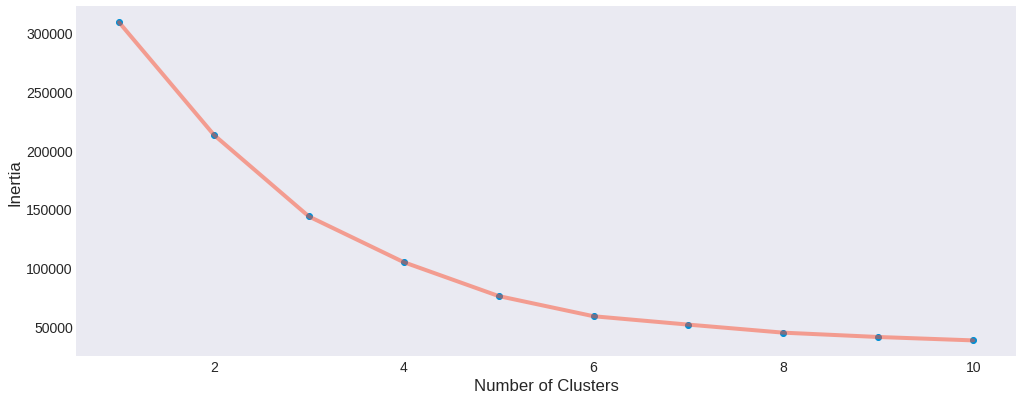

In [82]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X4)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [84]:
transformed_data = pca.transform(X4)
transformed_data = pd.DataFrame(transformed_data,columns=['Dimension 1','Dimension 2'])
transformed_data.head()

,Dimension 1,Dimension 2
0,-31.876469,-32.993119
1,0.753976,-56.838637
2,-57.413372,-13.116456
3,-2.181331,-53.479038
4,-32.180361,-30.378663


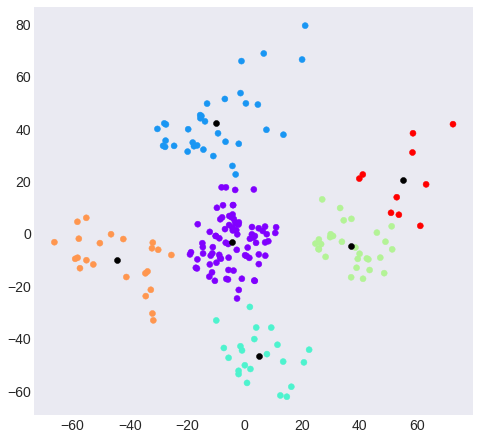

In [85]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(transformed_data)
kmeans.predict(transformed_data)

plt.scatter(transformed_data.iloc[:,0],transformed_data.iloc[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.show()

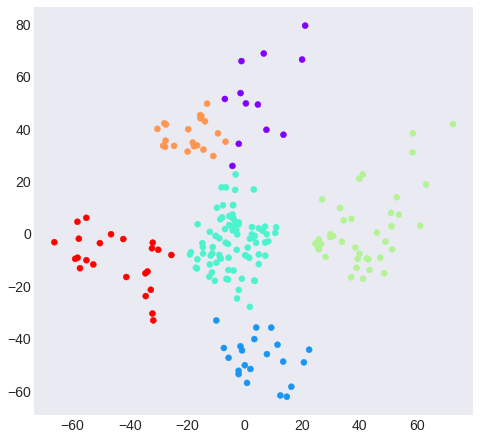

In [86]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6)
gmm.fit(transformed_data)
labels = gmm.predict(transformed_data)

plt.scatter(transformed_data.iloc[:,0],transformed_data.iloc[:,1],c=labels,cmap='rainbow')
plt.show()

In [87]:

cluster_proba_df = pd.DataFrame(gmm.predict_proba(transformed_data), columns = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'])
cluster_proba_df['Belongs to'] = cluster_proba_df.idxmax(axis=1)
cluster_proba_df.head()

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Belongs to
0,1.418277e-06,2.149994e-03,1.892306e-03,1.113688e-07,6.148380e-37,0.995956,Cluster 6
1,5.366895e-15,9.997836e-01,1.808464e-06,2.029097e-04,2.322823e-67,0.000012,Cluster 2
2,1.259489e-08,2.682066e-12,2.739299e-11,7.102709e-18,5.838612e-25,1.000000,Cluster 6
3,1.210187e-13,9.997194e-01,1.524895e-05,2.136682e-04,1.901180e-62,0.000052,Cluster 2
4,1.784513e-06,8.341064e-04,1.742292e-03,4.262875e-08,1.569183e-34,0.997422,Cluster 6


In [88]:
df['Cluster by 4 params'] = cluster_proba_df['Belongs to']
df.tail(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label3,Promo,Cluster by 4 params
180,181,Female,37,97,32,1,0,Cluster 1
181,182,Female,32,97,86,3,0,Cluster 4
182,183,Male,46,98,15,1,0,Cluster 1
183,184,Female,29,98,88,3,1,Cluster 4
184,185,Female,41,99,39,1,1,Cluster 1
185,186,Male,30,99,97,3,2,Cluster 4
186,187,Female,54,101,24,1,0,Cluster 1
187,188,Male,28,101,68,3,0,Cluster 4
188,189,Female,41,103,17,1,1,Cluster 1
189,190,Female,36,103,85,3,1,Cluster 4


### CUSTOMER UNSUBSCRIBE PREDICTION

In [89]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label3,Promo,Cluster by 4 params
0,1,Male,19,15,39,4,1,Cluster 6
1,2,Male,21,15,81,5,0,Cluster 2
2,3,Female,20,16,6,4,3,Cluster 6
3,4,Female,23,16,77,5,2,Cluster 2
4,5,Female,31,17,40,4,1,Cluster 6


In [90]:
df['subscribe'] = np.random.choice([0, 1], df.shape[0])

In [91]:
# 1 - subscribed, 0 - unsubscribed
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label3,Promo,Cluster by 4 params,subscribe
0,1,1,19,15,39,4,1,Cluster 6,1
1,2,1,21,15,81,5,0,Cluster 2,0
2,3,0,20,16,6,4,3,Cluster 6,0
3,4,0,23,16,77,5,2,Cluster 2,0
4,5,0,31,17,40,4,1,Cluster 6,0


In [92]:
y = df.subscribe

x = df.drop(columns=['subscribe','CustomerID', 'label3', 'Cluster by 4 params'])
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [93]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [94]:
train_data = lgb.Dataset(x, label=y)
test_data = lgb.Dataset(x_test, label=y_test)

In [95]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model = lgb.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's auc: 0.405
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.31
[3]	valid_0's auc: 0.345
[4]	valid_0's auc: 0.35125
[5]	valid_0's auc: 0.405
[6]	valid_0's auc: 0.38
[7]	valid_0's auc: 0.37875
[8]	valid_0's auc: 0.35375
[9]	valid_0's auc: 0.3625
[10]	valid_0's auc: 0.3675
[11]	valid_0's auc: 0.3675
[12]	valid_0's auc: 0.3525
[13]	valid_0's auc: 0.34125
[14]	valid_0's auc: 0.34375
[15]	valid_0's auc: 0.34625
[16]	valid_0's auc: 0.35625
[17]	valid_0's auc: 0.35125
[18]	valid_0's auc: 0.35625
[19]	valid_0's auc: 0.36375
[20]	valid_0's auc: 0.35375
[21]	valid_0's auc: 0.35
[22]	valid_0's auc: 0.355
[23]	valid_0's auc: 0.365
[24]	valid_0's auc: 0.365
[25]	valid_0's auc: 0.3775
[26]	valid_0's auc: 0.3825
[27]	valid_0's auc: 0.3925
[28]	valid_0's auc: 0.405
[29]	valid_0's auc: 0.41
[30]	valid_0's auc: 0.425
[31]	valid_0's auc: 0.4375
[32]	valid_0's auc: 0.4425
[33]	valid_0's auc: 0.4525
[34]	valid_0's auc: 0.4525
[35]	valid_0's auc: 0.4625
[36]	v

In [96]:
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Promo
113,1,19,64,46,1
183,0,29,98,88,1
71,0,47,49,42,2
191,0,32,103,69,1
182,1,46,98,15,0


In [97]:
data = [[0, 20, 50, 20, 0]] 
new_customers = pd.DataFrame(data, columns = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Promo'])

In [98]:
new_customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Promo
0,0,20,50,20,0


In [99]:
model.predict(new_customers)[0]

0.5375475747871783

If value is close to 0 than the chance is bigger that customer will unsubscribe. To give more precise results A/B test needed to find threshhold.
E.G.  <= 0.4 = Unsubscribe.

In [101]:
data = [[1, 20, 25, 68, 1], [0, 58, 30, 30, 1], [1, 30, 35, 100, 0], [0, 26, 49, 14, 0], [0, 39, 2, 13, 4]]
new_customers = pd.DataFrame(data, columns = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Promo'])

In [102]:
model.predict(new_customers)

array([0.434152  , 0.55200854, 0.44578548, 0.54926227, 0.47058746])

Likelihood that customer will unsubscribe is the maximum when it is closer to 0.

Due to data is absolutely random and syntetic results won't be very representative. But you can see the overall picture.